# Importing Citi Bike Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import statsmodels.formula.api as smf
import folium
import geopy
%matplotlib inline

In [2]:
#import the October citibike data in Manhattan 
cb = pd.read_csv('/Users/yanzhang/Downloads/201810-citibike-tripdata.csv')

In [3]:
#import the October citibike data in Jersey City
cb_jc = pd.read_csv('/Users/yanzhang/Downloads/JC-201810-citibike-tripdata.csv')

In [4]:
#appending the two into one dataframe
cb = cb.append(cb_jc)

In [5]:
cb

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1


In [6]:
cb.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id           float64
start station name          object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                   int64
gender                       int64
dtype: object

In [7]:
#dropping those with empty start stations or end stations
cb = cb.loc[cb['start station name'].notnull(),:]
cb = cb.loc[cb['end station name'].notnull(),:]

In [8]:
cb

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1


# Mapping Citi Bike Stations

In [9]:
cb_stations = cb.iloc[:,4:7]

In [10]:
cb_stations = cb_stations.drop_duplicates()

In [11]:
cb_stations2 = cb.iloc[:,8:11]
cb_stations2 = cb_stations2.drop_duplicates()

In [12]:
cb_stations = cb_stations.set_index('start station name')

In [13]:
cb_stations.index.names = ['station name']

In [14]:
cb_stations = cb_stations.rename(index=str, 
                                 columns={"start station latitude": "lat", "start station longitude": "lon"})

In [15]:
cb_stations2 = cb_stations2.set_index('end station name')
cb_stations2.index.names = ['station name']
cb_stations2 = cb_stations2.rename(index=str, 
                                   columns={"end station latitude": "lat", "end station longitude": "lon"})

In [16]:
cb_stations = cb_stations.append(cb_stations2)

In [17]:
cb_stations.drop_duplicates()

,lat,lon
station name,,
Lafayette St & E 8 St,40.730207,-73.991026
old - E 13 St & Avenue A,40.729554,-73.980572
W 15 St & 10 Ave,40.742754,-74.007474
Barclay St & Church St,40.712912,-74.010202
W 50 St & 9 Ave,40.763605,-73.989180
Berry St & N 8 St,40.719009,-73.958525
Catherine St & Monroe St,40.711174,-73.996826
E 97 St & 3 Ave,40.785920,-73.948603
Amsterdam Ave & W 66 St,40.774667,-73.984706


In [18]:
station_dict = cb_stations.to_dict()

In [19]:
station_names = cb_stations.index.tolist()

In [20]:
directory = {}
for station in station_names:
    lat = station_dict['lat'][station]
    lon = station_dict['lon'][station]
    location = [lat, lon]
    directory.update({station: location})
directory

{'Lafayette St & E 8 St': [40.73020660529954, -73.99102628231049],
 'old - E 13 St & Avenue A': [40.72955361, -73.98057249],
 'W 15 St & 10 Ave': [40.742753828659026, -74.00747358798982],
 'Barclay St & Church St': [40.71291224, -74.01020234],
 'W 50 St & 9 Ave': [40.76360467795863, -73.98917958140373],
 'Berry St & N 8 St': [40.7190095, -73.95852515],
 'Catherine St & Monroe St': [40.71117444, -73.99682619],
 'E 97 St & 3 Ave': [40.7859201, -73.94860294],
 'Amsterdam Ave & W 66 St': [40.7746671, -73.98470567],
 'Forsyth St & Broome St': [40.71893904, -73.99266288],
 'Sterling Pl & 7 Ave': [40.67716489469059, -73.97382795810701],
 'Park Ave & E 124 St': [40.8045555, -73.93968609999999],
 'W 106 St & Amsterdam Ave': [40.80083629999999, -73.9664492472],
 'Metropolitan Ave & Bedford Ave': [40.71534825, -73.96024116],
 'W 33 St & 7 Ave': [40.75019995, -73.99093085],
 'Cliff St & Fulton St': [40.70831794366396, -74.0050408244133],
 'W 67 St & Broadway': [40.77492513, -73.98266566],
 'Leonar

In [21]:
directory2 = {}
for station in station_names:
    lat = station_dict['lat'][station]
    lon = station_dict['lon'][station]
    location = (lat, lon)
    directory2.update({station: location})
directory2

{'Lafayette St & E 8 St': (40.73020660529954, -73.99102628231049),
 'old - E 13 St & Avenue A': (40.72955361, -73.98057249),
 'W 15 St & 10 Ave': (40.742753828659026, -74.00747358798982),
 'Barclay St & Church St': (40.71291224, -74.01020234),
 'W 50 St & 9 Ave': (40.76360467795863, -73.98917958140373),
 'Berry St & N 8 St': (40.7190095, -73.95852515),
 'Catherine St & Monroe St': (40.71117444, -73.99682619),
 'E 97 St & 3 Ave': (40.7859201, -73.94860294),
 'Amsterdam Ave & W 66 St': (40.7746671, -73.98470567),
 'Forsyth St & Broome St': (40.71893904, -73.99266288),
 'Sterling Pl & 7 Ave': (40.67716489469059, -73.97382795810701),
 'Park Ave & E 124 St': (40.8045555, -73.93968609999999),
 'W 106 St & Amsterdam Ave': (40.80083629999999, -73.9664492472),
 'Metropolitan Ave & Bedford Ave': (40.71534825, -73.96024116),
 'W 33 St & 7 Ave': (40.75019995, -73.99093085),
 'Cliff St & Fulton St': (40.70831794366396, -74.0050408244133),
 'W 67 St & Broadway': (40.77492513, -73.98266566),
 'Leonar

In [1]:
len(directory2)

NameError: name 'directory2' is not defined

In [22]:
station_map = folium.Map(
    location= [40.730207,-73.991026],
    zoom_start=12,
    tiles='Stamen Terrain'
)

In [23]:
station_map

In [24]:
for station in directory:
    location = directory[station]
    folium.CircleMarker(location,popup=station,color='green',radius=0.001).add_to(station_map)

In [25]:
station_map

# Top 10 Stations for Departure and Destination

In [26]:
trips = cb[['starttime', 'start station name', 'end station name']]

In [27]:
trips

,starttime,start station name,end station name
0,2018-10-01 00:00:00.7010,Lafayette St & E 8 St,1 Ave & E 16 St
1,2018-10-01 00:00:13.5780,old - E 13 St & Avenue A,E 9 St & Avenue C
2,2018-10-01 00:00:16.6040,W 15 St & 10 Ave,Broadway & E 14 St
3,2018-10-01 00:00:35.0670,Barclay St & Church St,W 15 St & 10 Ave
4,2018-10-01 00:00:38.1410,W 50 St & 9 Ave,W 47 St & 10 Ave
5,2018-10-01 00:00:39.0770,Berry St & N 8 St,Huron St & Franklin St
6,2018-10-01 00:00:45.6350,Catherine St & Monroe St,Fulton St & William St
7,2018-10-01 00:00:49.1740,E 97 St & 3 Ave,3 Ave & E 100 St
8,2018-10-01 00:00:55.9960,Catherine St & Monroe St,Fulton St & William St
9,2018-10-01 00:01:01.8550,Amsterdam Ave & W 66 St,Columbus Ave & W 72 St


In [28]:
start_station_popularity = trips.groupby('start station name')['starttime'].count().to_frame()

In [29]:
end_station_popularity = trips.groupby('end station name')['starttime'].count().to_frame()

In [30]:
start_station_popularity.index.names = ['station name']
start_station_popularity = start_station_popularity.rename(index=str, columns={"starttime": "number of trips starting"})
end_station_popularity.index.names = ['station name']
end_station_popularity = end_station_popularity.rename(index=str, columns={"starttime": "number of trips ending"})

In [31]:
start_station_popularity.sort_values(['number of trips starting'], ascending= False).head(10)

,number of trips starting
station name,
Pershing Square North,16264
Broadway & E 22 St,11935
E 17 St & Broadway,11537
W 21 St & 6 Ave,11467
8 Ave & W 33 St,10428
8 Ave & W 31 St,10109
West St & Chambers St,9843
Lafayette St & E 8 St,9431
Broadway & E 14 St,9414


In [32]:
end_station_popularity.sort_values(['number of trips ending'], ascending= False).head(10)

,number of trips ending
station name,
Pershing Square North,16271
E 17 St & Broadway,12117
Broadway & E 22 St,11971
W 21 St & 6 Ave,11589
8 Ave & W 33 St,10397
8 Ave & W 31 St,10374
West St & Chambers St,10070
W 20 St & 11 Ave,9554
Broadway & E 14 St,9391


# Popular trips

In [92]:
cb_trips = cb.groupby(['start station name','end station name']).size()

In [93]:
cb_trips.reset_index(name = 'number of trips')

,start station name,end station name,number of trips
0,1 Ave & E 110 St,1 Ave & E 110 St,30
1,1 Ave & E 110 St,1 Ave & E 62 St,3
2,1 Ave & E 110 St,1 Ave & E 68 St,9
3,1 Ave & E 110 St,1 Ave & E 78 St,3
4,1 Ave & E 110 St,1 Ave & E 94 St,12
5,1 Ave & E 110 St,2 Ave & E 104 St,8
6,1 Ave & E 110 St,2 Ave & E 122 St,13
7,1 Ave & E 110 St,2 Ave & E 31 St,22
8,1 Ave & E 110 St,2 Ave & E 55 St,1
9,1 Ave & E 110 St,2 Ave & E 96 St,204


In [94]:
cb_trips = cb_trips.sort_values(ascending = False)

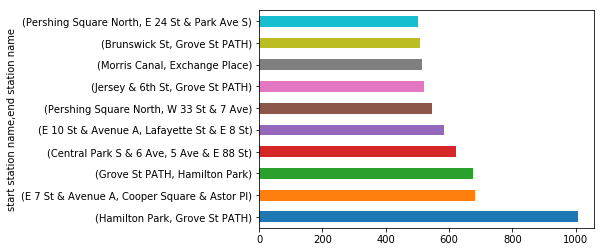

In [103]:
cb_trips.head(10).plot.barh()

# Mapping Stations Based on Popularity

In [33]:
start_dict = start_station_popularity.to_dict()
start_dict

{'number of trips starting': {'1 Ave & E 110 St': 1324,
  '1 Ave & E 16 St': 7675,
  '1 Ave & E 18 St': 5152,
  '1 Ave & E 30 St': 4450,
  '1 Ave & E 44 St': 3026,
  '1 Ave & E 62 St': 4046,
  '1 Ave & E 68 St': 6642,
  '1 Ave & E 78 St': 4230,
  '1 Ave & E 94 St': 1664,
  '1 Pl & Clinton St': 852,
  '10 Hudson Yards': 558,
  '10 St & 5 Ave': 663,
  '10 St & 7 Ave': 912,
  '11 Ave & W 27 St': 6018,
  '11 Ave & W 41 St': 4731,
  '11 Ave & W 59 St': 5223,
  '11 St & 35 Ave': 109,
  '11 St & 43 Ave': 170,
  '12 Ave & W 40 St': 9043,
  '12 St & 4 Ave': 484,
  '14 St & 5 Ave': 1208,
  '14 St & 7 Ave': 929,
  '19 St & 24 Ave': 462,
  '2 Ave & 36 St - Citi Bike HQ at Industry City': 842,
  '2 Ave & 9 St': 456,
  '2 Ave & E 104 St': 1209,
  '2 Ave & E 122 St': 509,
  '2 Ave & E 31 St': 4989,
  '2 Ave & E 55 St': 3093,
  '2 Ave & E 96 St': 2678,
  '2 Ave & E 99 St': 760,
  '21 St & 31 Dr': 627,
  '21 St & 36 Ave': 144,
  '21 St & 38 Ave': 160,
  '21 St & 43 Ave': 283,
  '21 St & Hoyt Ave S': 24

In [34]:
stations = start_station_popularity.index.tolist()
stations

['1 Ave & E 110 St',
 '1 Ave & E 16 St',
 '1 Ave & E 18 St',
 '1 Ave & E 30 St',
 '1 Ave & E 44 St',
 '1 Ave & E 62 St',
 '1 Ave & E 68 St',
 '1 Ave & E 78 St',
 '1 Ave & E 94 St',
 '1 Pl & Clinton St',
 '10 Hudson Yards',
 '10 St & 5 Ave',
 '10 St & 7 Ave',
 '11 Ave & W 27 St',
 '11 Ave & W 41 St',
 '11 Ave & W 59 St',
 '11 St & 35 Ave',
 '11 St & 43 Ave',
 '12 Ave & W 40 St',
 '12 St & 4 Ave',
 '14 St & 5 Ave',
 '14 St & 7 Ave',
 '19 St & 24 Ave',
 '2 Ave & 36 St - Citi Bike HQ at Industry City',
 '2 Ave & 9 St',
 '2 Ave & E 104 St',
 '2 Ave & E 122 St',
 '2 Ave & E 31 St',
 '2 Ave & E 55 St',
 '2 Ave & E 96 St',
 '2 Ave & E 99 St',
 '21 St & 31 Dr',
 '21 St & 36 Ave',
 '21 St & 38 Ave',
 '21 St & 43 Ave',
 '21 St & Hoyt Ave S',
 '21 St & Queens Plaza North',
 '23 Ave & 27 St',
 '24 Ave & 26 St',
 '24 Ave & 29 St',
 '24 St & 41 Ave',
 '27 Ave & 4 St',
 '27 Ave & 9 St',
 '27 St & Hunter St',
 '28 Ave & 35 St',
 '28 Ave & 44 St',
 '28 St & 36 Ave',
 '28 St & 38 Ave',
 '28 St & 40 Ave',

In [35]:
popularity_directory = {}
for station in stations:
    trips = start_dict['number of trips starting'][station]
    popularity_directory.update({station: trips})
popularity_directory

{'1 Ave & E 110 St': 1324,
 '1 Ave & E 16 St': 7675,
 '1 Ave & E 18 St': 5152,
 '1 Ave & E 30 St': 4450,
 '1 Ave & E 44 St': 3026,
 '1 Ave & E 62 St': 4046,
 '1 Ave & E 68 St': 6642,
 '1 Ave & E 78 St': 4230,
 '1 Ave & E 94 St': 1664,
 '1 Pl & Clinton St': 852,
 '10 Hudson Yards': 558,
 '10 St & 5 Ave': 663,
 '10 St & 7 Ave': 912,
 '11 Ave & W 27 St': 6018,
 '11 Ave & W 41 St': 4731,
 '11 Ave & W 59 St': 5223,
 '11 St & 35 Ave': 109,
 '11 St & 43 Ave': 170,
 '12 Ave & W 40 St': 9043,
 '12 St & 4 Ave': 484,
 '14 St & 5 Ave': 1208,
 '14 St & 7 Ave': 929,
 '19 St & 24 Ave': 462,
 '2 Ave & 36 St - Citi Bike HQ at Industry City': 842,
 '2 Ave & 9 St': 456,
 '2 Ave & E 104 St': 1209,
 '2 Ave & E 122 St': 509,
 '2 Ave & E 31 St': 4989,
 '2 Ave & E 55 St': 3093,
 '2 Ave & E 96 St': 2678,
 '2 Ave & E 99 St': 760,
 '21 St & 31 Dr': 627,
 '21 St & 36 Ave': 144,
 '21 St & 38 Ave': 160,
 '21 St & 43 Ave': 283,
 '21 St & Hoyt Ave S': 246,
 '21 St & Queens Plaza North': 792,
 '23 Ave & 27 St': 248,
 

In [60]:
heatmap = folium.Map(
    location= [40.730207,-73.991026],
    zoom_start=12,
    tiles='Stamen Terrain')

heatmap

In [61]:
for station in popularity_directory:
    location = directory[station]
    num = popularity_directory[station]
    folium.CircleMarker(location, color = 'green', radius=0.01, opacity=num/8000).add_to(heatmap)
heatmap

# Bike Use Rate

In [104]:
# Cleaning the data: dropping all the trips that's longer than 2 hours?
cb[['tripduration']].describe()

,tripduration
count,1.887070e+06
mean,7.432217e+02
std,5.308784e+02
min,6.100000e+01
25%,3.490000e+02
50%,5.830000e+02
75%,9.960000e+02
max,2.730000e+03


In [105]:
duration_upper_limit = cb[['tripduration']].mean() + 3*cb[['tripduration']].std()

In [106]:
duration_upper_limit

tripduration    2335.856805
dtype: float64

In [107]:
cb = cb.loc[cb['tripduration'] <= 2336]

In [108]:
cb

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1,23
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1,51
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2,35
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1,30
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0,49
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1,35
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2,26
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1,35
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1,23
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1,45


In [109]:
# Rank bikes based on number of times used
cb_bike_use = cb.groupby('bikeid').size().reset_index(name = 'number of times used')

In [110]:
cb_bike_use = cb_bike_use.sort_values('number of times used', ascending = False)

In [111]:
cb_bike_use.head(10)

,bikeid,number of times used
10752,34695,608
10882,34869,567
10765,34710,538
10781,34730,534
10210,33892,522
10766,34712,521
10102,33780,513
10142,33821,500
10740,34682,499
10663,34376,499


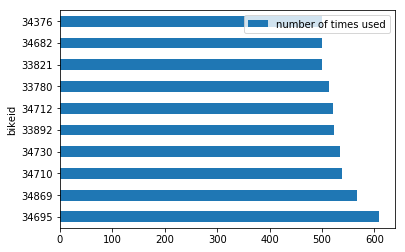

In [112]:
cb_bike_use.set_index('bikeid').head(10).plot(kind='barh')

In [113]:
# Rank bikes based on minutes traveled
cb_bike_use_minute = cb.groupby('bikeid')['tripduration'].sum() / 60

In [127]:
cb_bike_use_minute = cb_bike_use_minute.sort_values('tripduration', ascending = False)

In [128]:
cb_bike_use_minute.head(10)

,tripduration
bikeid,
34695,7775.216667
34869,7351.300000
34710,7187.316667
34712,7109.366667
34682,6774.100000
33892,6657.466667
34730,6576.850000
34709,6552.733333
34724,6433.650000


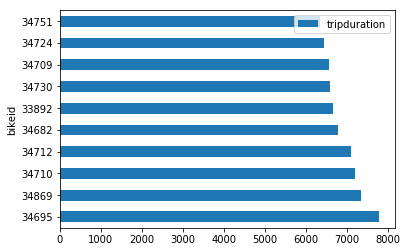

In [129]:
cb_bike_use_minute.head(10).plot(kind='barh')

In [130]:
cb['bikeid'].nunique()

11367

In [131]:
bikes = cb.groupby('bikeid')['starttime'].count().sort_values(ascending = False).to_frame()

In [132]:
# if a bike is used less than 31 times, we deem it 'not being efficiently used'
bikes.loc[bikes['starttime'] <= 31].shape[0]

986

In [134]:
# the percentage of bikes being efficiently used
1 - 966/11368

0.9150246305418719

# Statistical Analysis of Customer Demographics
1. Regression on gender and trip duration
2. regression on age and trip duration

In [12]:
cb['age'] = 2018 - cb['birth year']

In [13]:
age_upper_limit = cb['age'].mean() + 2*cb['age'].std()

In [14]:
birth_year_limit = 2018 - age_upper_limit

In [15]:
# dropping those with age more than 75
cb_age = cb.loc[cb['birth year'] >= birth_year_limit]

In [16]:
cb_age

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1,23
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1,51
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2,35
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1,30
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0,49
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1,35
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2,26
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1,35
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1,23
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1,45


In [17]:
print(smf.ols('tripduration ~ age', data = cb_age).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     53.22
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.99e-13
Time:                        19:08:54   Log-Likelihood:            -1.9490e+07
No. Observations:             1861572   AIC:                         3.898e+07
Df Residuals:                 1861570   BIC:                         3.898e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    737.8329     22.454     32.860      0.0

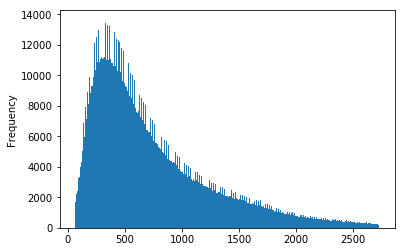

In [73]:
cb_age['tripduration'].plot.hist(bins = 500)

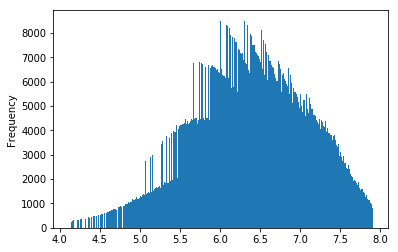

In [74]:
np.log(cb_age['tripduration']).plot.hist(bins=500)

In [75]:
print(smf.ols('np.log(tripduration) ~ age', data = cb_age).fit().summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(tripduration)   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     2813.
Date:                  Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                          12:46:21   Log-Likelihood:            -2.0210e+06
No. Observations:               1831730   AIC:                         4.042e+06
Df Residuals:                   1831728   BIC:                         4.042e+06
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2616      0.002

In [76]:
cb_gender = cb.loc[cb['gender'] != 2]

In [77]:
print(smf.ols('tripduration ~ gender + age', data = cb_gender).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                 3.067e+04
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:46:43   Log-Likelihood:            -1.1018e+07
No. Observations:             1437013   AIC:                         2.204e+07
Df Residuals:                 1437010   BIC:                         2.204e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1045.3774      2.328    449.075      0.0

# Distance traveled and Speed

In [9]:
import geopy.distance

In [18]:
cb

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1,23
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1,51
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2,35
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1,30
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0,49
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1,35
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2,26
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1,35
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1,23
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1,45


In [19]:
cb_distance = cb[['tripduration', 'start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'gender', 'age']]

In [20]:
cb_distance

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,gender,age
0,330,40.730207,-73.991026,40.732219,-73.981656,1,23
1,309,40.729554,-73.980572,40.725213,-73.977688,1,51
2,734,40.742754,-74.007474,40.734546,-73.990741,2,35
3,788,40.712912,-74.010202,40.742754,-74.007474,1,30
4,1136,40.763605,-73.989180,40.762699,-73.993012,0,49
5,623,40.719009,-73.958525,40.732660,-73.958260,1,35
6,498,40.711174,-73.996826,40.709560,-74.006536,2,26
7,103,40.785920,-73.948603,40.787721,-73.947283,1,35
8,484,40.711174,-73.996826,40.709560,-74.006536,1,23
9,252,40.774667,-73.984706,40.777057,-73.978985,1,45


In [21]:
def distance_calculator(a,b,c,d):
    return geopy.distance.vincenty((a, b),(c, d)).miles

In [24]:
cb['distance'] = cb[['start station latitude','start station longitude','end station latitude','end station longitude']].apply(lambda x: distance_calculator(*x), axis=1)

In [25]:
cb

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,distance
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1,23,0.511094
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1,51,0.335616
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2,35,1.044992
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1,30,2.064118
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0,49,0.210574
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1,35,0.942020
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2,26,0.521876
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1,35,0.142266
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1,23,0.521876
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1,45,0.342439


In [26]:
cb['speed'] = 3600*cb['distance'] / cb['tripduration']

In [27]:
cb

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,distance,speed
0,330,2018-10-01 00:00:00.7010,2018-10-01 00:05:30.8490,293.0,Lafayette St & E 8 St,40.730207,-73.991026,504.0,1 Ave & E 16 St,40.732219,-73.981656,30493,Subscriber,1995,1,23,0.511094,5.575570
1,309,2018-10-01 00:00:13.5780,2018-10-01 00:05:23.2310,433.0,old - E 13 St & Avenue A,40.729554,-73.980572,394.0,E 9 St & Avenue C,40.725213,-73.977688,33054,Subscriber,1967,1,51,0.335616,3.910095
2,734,2018-10-01 00:00:16.6040,2018-10-01 00:12:31.5050,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,285.0,Broadway & E 14 St,40.734546,-73.990741,33400,Subscriber,1983,2,35,1.044992,5.125302
3,788,2018-10-01 00:00:35.0670,2018-10-01 00:13:43.5780,417.0,Barclay St & Church St,40.712912,-74.010202,3472.0,W 15 St & 10 Ave,40.742754,-74.007474,31140,Customer,1988,1,30,2.064118,9.429983
4,1136,2018-10-01 00:00:38.1410,2018-10-01 00:19:34.6490,3699.0,W 50 St & 9 Ave,40.763605,-73.989180,495.0,W 47 St & 10 Ave,40.762699,-73.993012,20294,Subscriber,1969,0,49,0.210574,0.667312
5,623,2018-10-01 00:00:39.0770,2018-10-01 00:11:02.7910,3092.0,Berry St & N 8 St,40.719009,-73.958525,3116.0,Huron St & Franklin St,40.732660,-73.958260,17904,Customer,1983,1,35,0.942020,5.443456
6,498,2018-10-01 00:00:45.6350,2018-10-01 00:09:04.4050,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,26719,Subscriber,1992,2,26,0.521876,3.772597
7,103,2018-10-01 00:00:49.1740,2018-10-01 00:02:32.5410,3309.0,E 97 St & 3 Ave,40.785920,-73.948603,3327.0,3 Ave & E 100 St,40.787721,-73.947283,21304,Subscriber,1983,1,35,0.142266,4.972389
8,484,2018-10-01 00:00:55.9960,2018-10-01 00:09:00.5120,2009.0,Catherine St & Monroe St,40.711174,-73.996826,316.0,Fulton St & William St,40.709560,-74.006536,16296,Subscriber,1995,1,23,0.521876,3.881722
9,252,2018-10-01 00:01:01.8550,2018-10-01 00:05:14.6200,3356.0,Amsterdam Ave & W 66 St,40.774667,-73.984706,3164.0,Columbus Ave & W 72 St,40.777057,-73.978985,17174,Subscriber,1973,1,45,0.342439,4.891983


In [102]:
cb_distance = cb[['tripduration','gender', 'age', 'distance','speed', 'usertype']]

In [105]:
cb_distance = cb_distance.loc[cb_distance['usertype'] == 'Subscriber']

In [107]:
cb_distance = cb_distance.loc[cb_distance['gender'] != 2]

In [108]:
cb_distance.groupby('gender').mean()

,tripduration,age,distance,speed
gender,,,,
0,803.786336,44.970896,1.048516,5.522561
1,745.554056,38.159113,1.069879,5.894198


In [109]:
cb_plot = cb_distance[['age', 'gender','speed', 'distance']]

In [110]:
cb_plot = cb_plot.loc[cb_plot['speed'] <= 15]

In [111]:
cb_plot = cb_plot.loc[cb_plot['age'] <= 60]

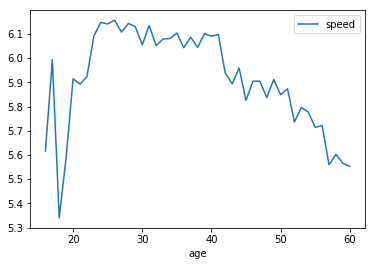

In [112]:
# Female speed and age
cb_plot.loc[cb_plot.gender == 1].groupby('age').median()['speed'].to_frame().plot()

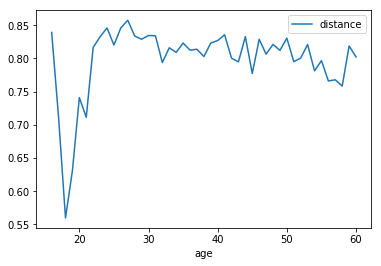

In [113]:
# Female distance and age
cb_plot.loc[cb_plot.gender == 1].groupby('age').median()['distance'].to_frame().plot()

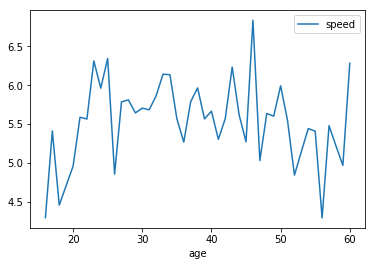

In [114]:
# Male
cb_plot.loc[cb_plot.gender == 0].groupby('age').median()['speed'].to_frame().plot()

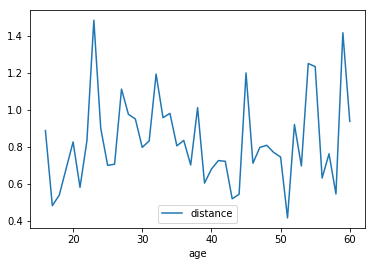

In [115]:
# Male distance and age
cb_plot.loc[cb_plot.gender == 0].groupby('age').median()['distance'].to_frame().plot()


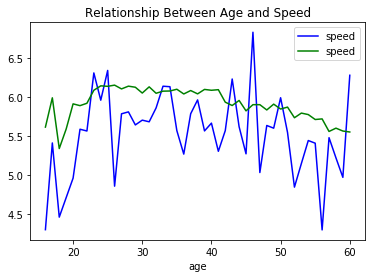

In [116]:
fig, ax = plt.subplots()
cb_plot.loc[cb_plot.gender == 0].groupby('age').median()['speed'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['blue'],  
        title='Relationship Between Age and Speed')

cb_plot.loc[cb_plot.gender == 1].groupby('age').median()['speed'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['green'])

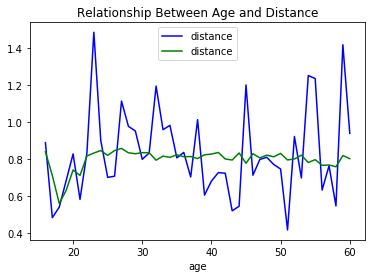

In [117]:
fig, ax = plt.subplots()
cb_plot.loc[cb_plot.gender == 0].groupby('age').median()['distance'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['blue'],  
        title='Relationship Between Age and Distance')

cb_plot.loc[cb_plot.gender == 1].groupby('age').median()['distance'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['green'])